In [ ]:
import pandas as pd


df = pd.read_csv("/content/IMDB Dataset.csv", on_bad_lines='skip')  # For pandas >= 1.3



In [ ]:
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [ ]:
print(f"Total Rows: {df.shape[0]}")
print(f"Total Columns: {df.shape[1]}")
print(f"Column Names: {df.columns.tolist()}")


Total Rows: 50000
Total Columns: 2
Column Names: ['review', 'sentiment']


In [ ]:
print("Missing values:\n", df.isnull().sum())
print(f"Duplicate rows: {df.duplicated().sum()}")


Missing values:
 review       0
sentiment    0
dtype: int64
Duplicate rows: 418


<ipython-input-12-98560e3f6b67>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment', palette='pastel')


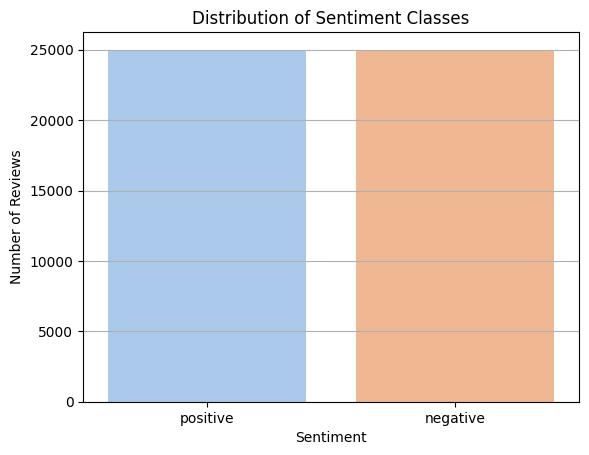

Class counts:
 sentiment
positive    25000
negative    25000
Name: count, dtype: int64


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='sentiment', palette='pastel')
plt.title("Distribution of Sentiment Classes")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.grid(axis='y')
plt.show()

print("Class counts:\n", df['sentiment'].value_counts())


In [ ]:
df['review_length_words'] = df['review'].apply(lambda x: len(str(x).split()))
df['review_length_chars'] = df['review'].apply(lambda x: len(str(x)))

# Word-level
print("Word Length Stats:\n", df['review_length_words'].describe())
# Char-level
print("\n Character Length Stats:\n", df['review_length_chars'].describe())


Word Length Stats:
 count    50000.000000
mean       231.156940
std        171.343997
min          4.000000
25%        126.000000
50%        173.000000
75%        280.000000
max       2470.000000
Name: review_length_words, dtype: float64

 Character Length Stats:
 count    50000.000000
mean      1309.431020
std        989.728014
min         32.000000
25%        699.000000
50%        970.000000
75%       1590.250000
max      13704.000000
Name: review_length_chars, dtype: float64


In [ ]:
df

,review,sentiment,review_length_words,review_length_chars
0,One of the other reviewers has mentioned that ...,positive,307,1761
1,A wonderful little production. <br /><br />The...,positive,162,998
2,I thought this was a wonderful way to spend ti...,positive,166,926
3,Basically there's a family where a little boy ...,negative,138,748
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,230,1317
...,...,...,...,...
49995,I thought this movie did a down right good job...,positive,194,1008
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,112,642
49997,I am a Catholic taught in parochial elementary...,negative,230,1280
49998,I'm going to have to disagree with the previou...,negative,212,1234


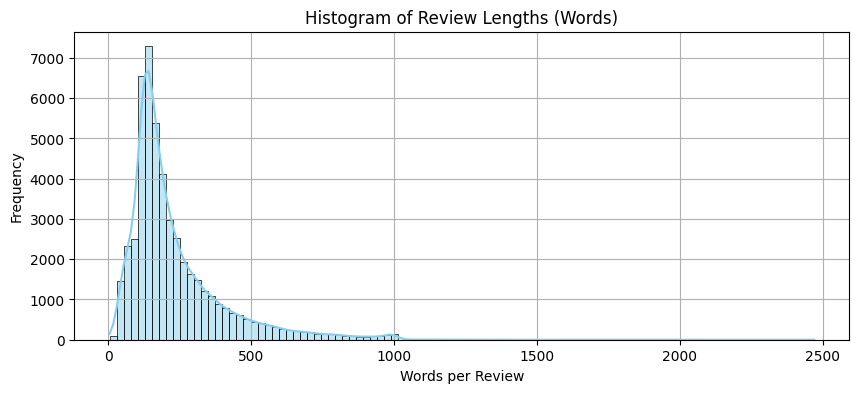

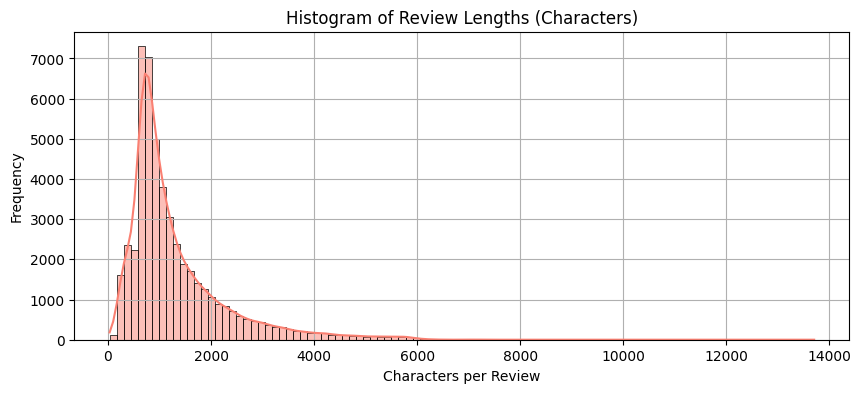

In [ ]:
# Word count distribution
plt.figure(figsize=(10,4))
sns.histplot(df['review_length_words'], bins=100, kde=True, color="skyblue")
plt.title("Histogram of Review Lengths (Words)")
plt.xlabel("Words per Review")
plt.ylabel("Frequency")
plt.grid()
plt.show()

# Character count distribution
plt.figure(figsize=(10,4))
sns.histplot(df['review_length_chars'], bins=100, kde=True, color="salmon")
plt.title("Histogram of Review Lengths (Characters)")
plt.xlabel("Characters per Review")
plt.ylabel("Frequency")
plt.grid()
plt.show()


<ipython-input-17-3b280947c201>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sentiment', y='review_length_words', data=df, palette='Set2')


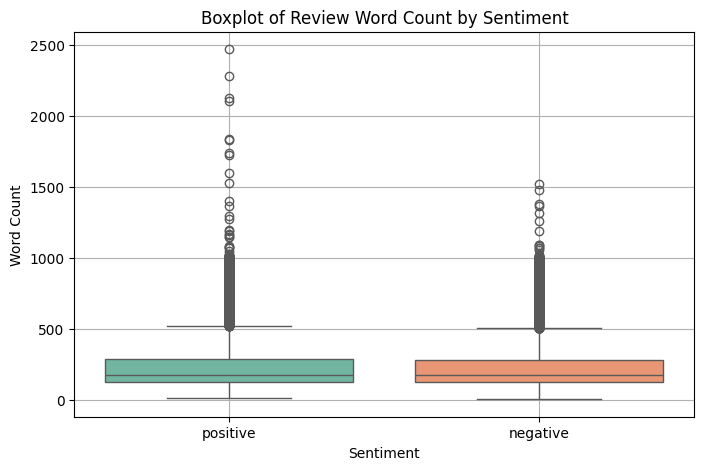

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='sentiment', y='review_length_words', data=df, palette='Set2')
plt.title("Boxplot of Review Word Count by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Word Count")
plt.grid()
plt.show()


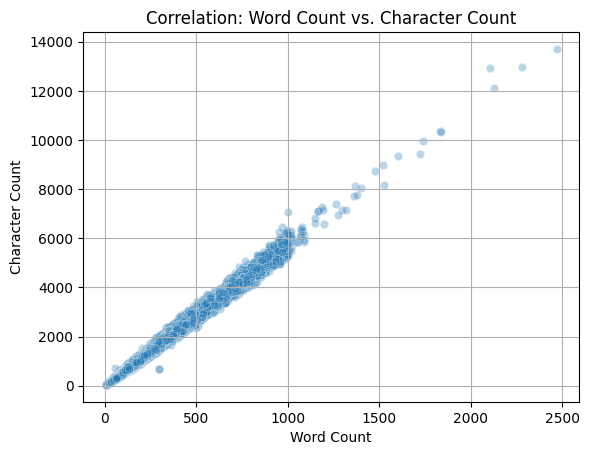

In [ ]:
sns.scatterplot(x='review_length_words', y='review_length_chars', data=df, alpha=0.3)
plt.title("Correlation: Word Count vs. Character Count")
plt.xlabel("Word Count")
plt.ylabel("Character Count")
plt.grid()
plt.show()


In [ ]:
df

,review,sentiment,review_length_words,review_length_chars
0,One of the other reviewers has mentioned that ...,positive,307,1761
1,A wonderful little production. <br /><br />The...,positive,162,998
2,I thought this was a wonderful way to spend ti...,positive,166,926
3,Basically there's a family where a little boy ...,negative,138,748
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,230,1317
...,...,...,...,...
49995,I thought this movie did a down right good job...,positive,194,1008
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,112,642
49997,I am a Catholic taught in parochial elementary...,negative,230,1280
49998,I'm going to have to disagree with the previou...,negative,212,1234


In [ ]:
grouped_lengths = df.groupby('sentiment')[['review_length_words', 'review_length_chars']].mean()
print("📊 Average Lengths by Sentiment:\n", grouped_lengths)


📊 Average Lengths by Sentiment:
            review_length_words  review_length_chars
sentiment                                          
negative             229.46456           1294.06436
positive             232.84932           1324.79768


### 🔤 WordClouds for Positive vs Negative Reviews

A **WordCloud** is a visual representation of the most frequently used words in a text corpus. The larger the word appears in the cloud, the more often it occurs in the dataset.

In this project, we generate separate WordClouds for **positive** and **negative** movie reviews to:
- **Identify common vocabulary** used in each sentiment class.
- **Visualize the emotional tone** of the reviews.
- **Support feature understanding** before modeling.

For example:
- The **positive WordCloud** often features words like `amazing`, `great`, `love`, `wonderful`.
- The **negative WordCloud** highlights terms such as `boring`, `bad`, `worst`, `disappointed`.

These visualizations offer quick, intuitive insights into the dataset and help us understand the linguistic patterns associated with each sentiment class.


In [ ]:
from wordcloud import WordCloud
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words("english"))

def clean_for_wordcloud(text):
    text = str(text).lower()
    text = re.sub(r"<.*?>", " ", text)  # remove HTML
    text = re.sub(r"[^a-z\s]", " ", text)  # remove punctuation and numbers
    return " ".join([word for word in text.split() if word not in stop_words])

# Generate WordClouds
positive_text = " ".join(df[df["sentiment"] == "positive"]["review"].apply(clean_for_wordcloud))
negative_text = " ".join(df[df["sentiment"] == "negative"]["review"].apply(clean_for_wordcloud))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


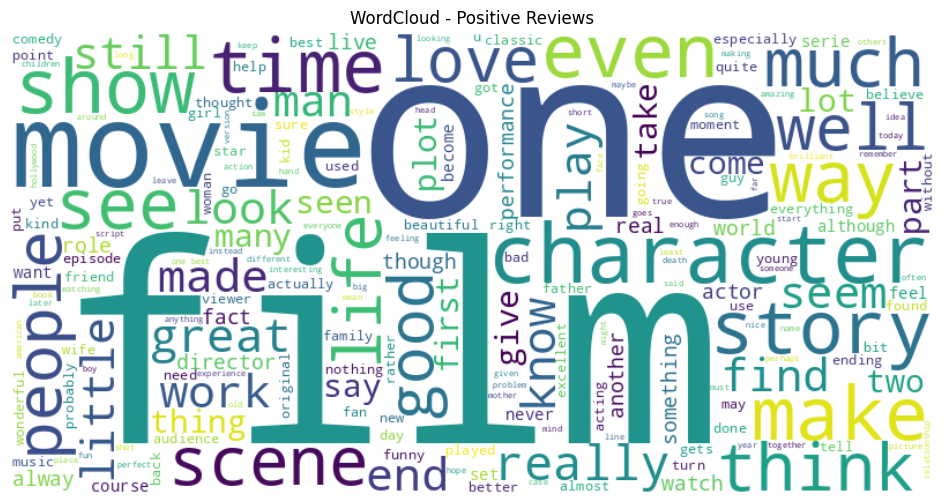

In [ ]:
# Positive
plt.figure(figsize=(12,6))
wc_pos = WordCloud(width=800, height=400, background_color="white").generate(positive_text)
plt.imshow(wc_pos, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud - Positive Reviews")
plt.show()



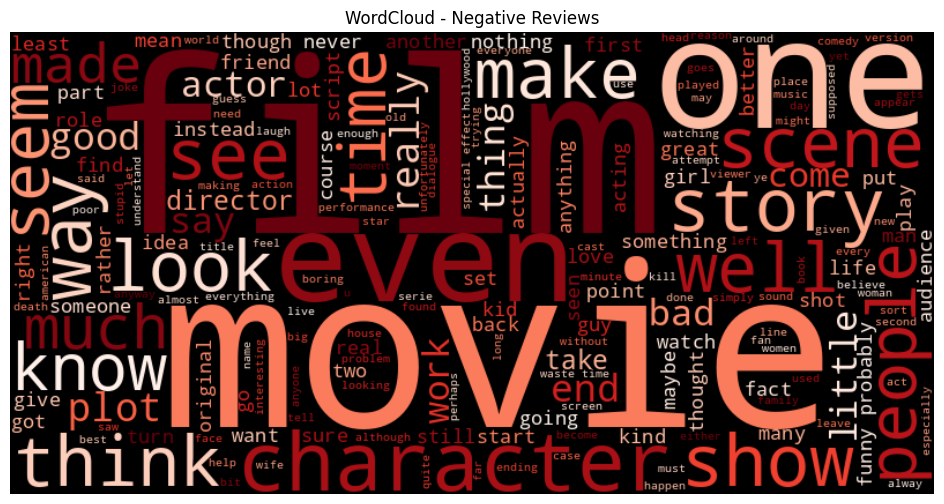

In [ ]:
# Negative
plt.figure(figsize=(12,6))
wc_neg = WordCloud(width=800, height=400, background_color="black", colormap='Reds').generate(negative_text)
plt.imshow(wc_neg, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud - Negative Reviews")
plt.show()


In [ ]:
df

,review,sentiment,review_length_words,review_length_chars
0,One of the other reviewers has mentioned that ...,positive,307,1761
1,A wonderful little production. <br /><br />The...,positive,162,998
2,I thought this was a wonderful way to spend ti...,positive,166,926
3,Basically there's a family where a little boy ...,negative,138,748
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,230,1317
...,...,...,...,...
49995,I thought this movie did a down right good job...,positive,194,1008
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,112,642
49997,I am a Catholic taught in parochial elementary...,negative,230,1280
49998,I'm going to have to disagree with the previou...,negative,212,1234


In [ ]:
summary = pd.DataFrame({
    "Metric": ["Total Samples", "Positive Reviews", "Negative Reviews",
               "Avg Word Length", "Avg Char Length"],
    "Value": [
        df.shape[0],
        df['sentiment'].value_counts()['positive'],
        df['sentiment'].value_counts()['negative'],
        round(df['review_length_words'].mean(), 2),
        round(df['review_length_chars'].mean(), 2)
    ]
})
print(summary)


             Metric     Value
0     Total Samples  50000.00
1  Positive Reviews  25000.00
2  Negative Reviews  25000.00
3   Avg Word Length    231.16
4   Avg Char Length   1309.43


In [ ]:
df

,review,sentiment,review_length_words,review_length_chars
0,One of the other reviewers has mentioned that ...,positive,307,1761
1,A wonderful little production. <br /><br />The...,positive,162,998
2,I thought this was a wonderful way to spend ti...,positive,166,926
3,Basically there's a family where a little boy ...,negative,138,748
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,230,1317
...,...,...,...,...
49995,I thought this movie did a down right good job...,positive,194,1008
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,112,642
49997,I am a Catholic taught in parochial elementary...,negative,230,1280
49998,I'm going to have to disagree with the previou...,negative,212,1234


In [ ]:
df['label'] = df['sentiment'].map({'positive': 1, 'negative': 0})


In [ ]:
df

,review,sentiment,review_length_words,review_length_chars,label
0,One of the other reviewers has mentioned that ...,positive,307,1761,1
1,A wonderful little production. <br /><br />The...,positive,162,998,1
2,I thought this was a wonderful way to spend ti...,positive,166,926,1
3,Basically there's a family where a little boy ...,negative,138,748,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,230,1317,1
...,...,...,...,...,...
49995,I thought this movie did a down right good job...,positive,194,1008,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,112,642,0
49997,I am a Catholic taught in parochial elementary...,negative,230,1280,0
49998,I'm going to have to disagree with the previou...,negative,212,1234,0


In [ ]:
import re

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'<.*?>', ' ', text)  # remove HTML tags
    text = re.sub(r'[^a-z\s]', ' ', text)  # keep only letters
    text = re.sub(r'\s+', ' ', text).strip()  # remove extra whitespace
    return text

df['clean_review'] = df['review'].apply(clean_text)


In [ ]:
df

,review,sentiment,review_length_words,review_length_chars,label,clean_review
0,One of the other reviewers has mentioned that ...,positive,307,1761,1,one of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...,positive,162,998,1,a wonderful little production the filming tech...
2,I thought this was a wonderful way to spend ti...,positive,166,926,1,i thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...,negative,138,748,0,basically there s a family where a little boy ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,230,1317,1,petter mattei s love in the time of money is a...
...,...,...,...,...,...,...
49995,I thought this movie did a down right good job...,positive,194,1008,1,i thought this movie did a down right good job...
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,112,642,0,bad plot bad dialogue bad acting idiotic direc...
49997,I am a Catholic taught in parochial elementary...,negative,230,1280,0,i am a catholic taught in parochial elementary...
49998,I'm going to have to disagree with the previou...,negative,212,1234,0,i m going to have to disagree with the previou...


In [ ]:
df['review_length_words'].describe()


,review_length_words
count,50000.000000
mean,231.156940
std,171.343997
min,4.000000
25%,126.000000
50%,173.000000
75%,280.000000
max,2470.000000


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [ ]:
# Tokenize the top N frequent words
MAX_VOCAB = 10000  # Limit vocab size. The variable MAX_VOCAB controls the maximum number of unique words (i.e., vocabulary size) that the tokenizer will keep when converting text to numbers.
MAX_LEN = 300      # Max review length (based on EDA)

tokenizer = Tokenizer(num_words=MAX_VOCAB, oov_token="<OOV>")
tokenizer.fit_on_texts(df['clean_review'])

# Convert to integer sequences
sequences = tokenizer.texts_to_sequences(df['clean_review'])

# Pad sequences
X = pad_sequences(sequences, maxlen=MAX_LEN, padding='post', truncating='post')
y = df['label'].values


In [ ]:
X.shape

(50000, 300)

In [ ]:
y.shape

(50000,)

In [ ]:
X

array([[  29,    5,    2, ...,   18,   48,    7],
       [   4,  391,  121, ...,    0,    0,    0],
       [  10,  192,   11, ...,    0,    0,    0],
       ...,
       [  10,  231,    4, ...,    0,    0,    0],
       [  10,  139,  168, ...,    0,    0,    0],
       [  57,   29, 5820, ...,    0,    0,    0]], dtype=int32)

In [ ]:
y

array([1, 1, 1, ..., 0, 0, 0])

### 🧼 Text Preprocessing Explanation

The following code prepares the raw text reviews to be used as input for an Artificial Neural Network (ANN):

```python
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

MAX_VOCAB = 10000
MAX_LEN = 300

tokenizer = Tokenizer(num_words=MAX_VOCAB, oov_token="<OOV>")
tokenizer.fit_on_texts(df['clean_review'])

sequences = tokenizer.texts_to_sequences(df['clean_review'])
X = pad_sequences(sequences, maxlen=MAX_LEN, padding='post', truncating='post')
y = df['label'].values


Explanation of Each Step:

Tokenizer(...): Builds a vocabulary of the most frequent MAX_VOCAB words and assigns a unique integer ID to each word.

texts_to_sequences(...): Converts each review (string of words) into a list of corresponding integers.

pad_sequences(...): Pads or truncates each sequence to a fixed length (MAX_LEN), so all inputs have the same shape.

y = df['label'].values: Extracts sentiment labels (0 for negative, 1 for positive) for training.

The result is:

X: A matrix of shape [num_reviews, MAX_LEN], suitable for input to an ANN.

y: A binary array of sentiment labels.

perl
Copy
Edit



---

### 🔁 Does the Same Word Always Get the Same Number?

```markdown
### 🔁 Token Consistency: Does the Same Word Always Map to the Same Number?

✅ Yes — when using `Tokenizer` from Keras, **each word is always assigned the same index** consistently throughout the dataset.

For example:
- If the word `"great"` is mapped to index `27`, then **every time `"great"` appears**, it will be represented as `27`.

This consistency is essential for model learning, because:
- Neural networks operate on numbers.
- If the same word were randomly mapped each time, the model wouldn’t be able to learn meaningful patterns.

> 💡 This mapping is determined during `tokenizer.fit_on_texts(...)` and is stored in `tokenizer.word_index`.

**Example**:
- `"great movie"` → `[27, 102]`
- `"great performance"` → `[27, 56]`

In both cases, `"great"` becomes `27`.


### 🧠 Input Format for the ANN Model

The input to the Artificial Neural Network (ANN) model must be a 2-dimensional numerical matrix where each row corresponds to a single movie review. Each review is represented as a fixed-length sequence of integers. These integers are indices corresponding to words in a predefined vocabulary built from the dataset.

The matrix has the shape:
(number of reviews, maximum number of tokens per review)


- This "maximum number of tokens" is a fixed value (commonly set to 300) that ensures all reviews—regardless of their original length—are either truncated (if too long) or padded with zeros (if too short) to achieve a uniform length. Padding makes it possible to feed the data into the network in batches with consistent shape.

- Each integer in a review's sequence represents a specific word. The same word will always be represented by the same integer throughout the dataset, ensuring consistency. Unknown or rare words not present in the top N most frequent words are replaced with a special out-of-vocabulary (OOV) token, also represented by an integer.

- This format is necessary because neural networks require numerical and fixed-size input. The fixed length enables the use of embedding layers and makes batch processing possible. Padding and truncation ensure that no review is shorter or longer than the expected size, maintaining the structure required for efficient training.


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [ ]:
X_train

array([[  10, 1011,   11, ...,    0,    0,    0],
       [  10,   51,   22, ...,    0,    0,    0],
       [1297, 4577,    8, ...,    0,    0,    0],
       ...,
       [  11,   14,  141, ...,    0,    0,    0],
       [  11,    7,   34, ...,    0,    0,    0],
       [  11,   16, 1390, ...,    0,    0,    0]], dtype=int32)

In [ ]:
X_train.shape

(40000, 300)

In [ ]:
y_train.shape

(40000,)

In [ ]:
X_test.shape

(10000, 300)

In [ ]:
y_test.shape

(10000,)

In [ ]:

!pip install tensorflow scikit-learn matplotlib seaborn


import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, f1_score

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam


model = Sequential([
    Embedding(input_dim=MAX_VOCAB, output_dim=128, input_length=MAX_LEN),
    GlobalAveragePooling1D(),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)

model.summary()


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Embedding, GlobalMaxPooling1D, Dense,
    Dropout, BatchNormalization
)
from tensorflow.keras.optimizers import Adam


model = Sequential([
    # Embedding Layer: Learns vector representations of words
    Embedding(input_dim=MAX_VOCAB, output_dim=300, input_length=MAX_LEN),

    # Global Max Pooling: Picks most important features across sequence
    GlobalMaxPooling1D(),

    # Dense Block 1
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),

    # Dense Block 2
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),

    # Dense Block 3
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    # 6. Output Layer
    Dense(1, activation='sigmoid')  # For binary classification
])


model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(learning_rate=0.0005),
    metrics=['accuracy']
)

# Display the architecture summary
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_1          │ ?                      │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=15,
    batch_size=128,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 43s 152ms/step - accuracy: 0.6500 - loss: 0.6890 - val_accuracy: 0.5038 - val_loss: 0.6588
Epoch 2/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 40s 149ms/step - accuracy: 0.8496 - loss: 0.3431 - val_accuracy: 0.8048 - val_loss: 0.4202
Epoch 3/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 42s 154ms/step - accuracy: 0.8937 - loss: 0.2602 - val_accuracy: 0.8569 - val_loss: 0.3296
Epoch 4/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 39s 156ms/step - accuracy: 0.9119 - loss: 0.2245 - val_accuracy: 0.8530 - val_loss: 0.3761
Epoch 5/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 42s 159ms/step - accuracy: 0.9328 - loss: 0.1770 - val_accuracy: 0.8676 - val_loss: 0.3754


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8611 - loss: 0.3218

✅ Test Accuracy: 0.8600
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


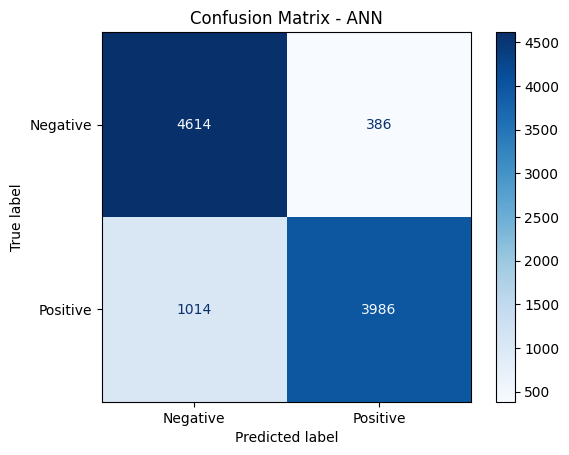


🎯 Macro F1 Score: 0.8594

📄 Classification Report:
              precision    recall  f1-score   support

    Negative       0.82      0.92      0.87      5000
    Positive       0.91      0.80      0.85      5000

    accuracy                           0.86     10000
   macro avg       0.87      0.86      0.86     10000
weighted avg       0.87      0.86      0.86     10000



In [ ]:
# 🔍 Evaluate on test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\n✅ Test Accuracy: {accuracy:.4f}")

# 🎯 Predict and binarize
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype("int32").flatten()

# 📊 Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Positive"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - ANN")
plt.grid(False)
plt.show()

# 🧮 Macro F1 score
macro_f1 = f1_score(y_test, y_pred, average='macro')
print(f"\n🎯 Macro F1 Score: {macro_f1:.4f}")

# 📋 Classification report
print("\n📄 Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))


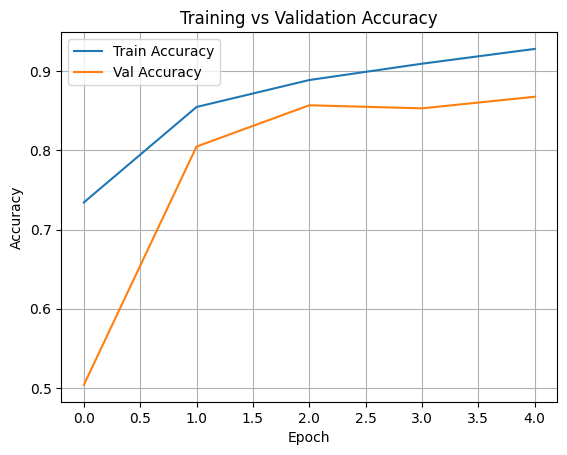

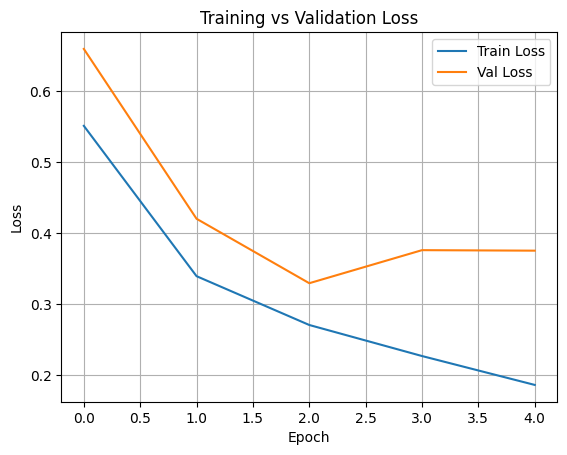

In [ ]:
# Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()
